In [148]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.regression import mean_squared_error
from sklearn.metrics.regression import mean_absolute_error
from sklearn.externals import joblib

In [149]:
# cargamos el horizonte de la serie a predecir con las features
df_v40_hour_h1 = pd.read_csv('pozo_izquierdo_torre_me_h_1.csv', delimiter=';')
df_v40_hour_h1.head()

,target_date,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,target
0,2004-07-01 00:10:00,9.6,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5
1,2004-07-01 00:11:00,9.6,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2
2,2004-07-01 00:12:00,9.8,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3
3,2004-07-01 00:13:00,9.6,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7
4,2004-07-01 00:14:00,10.2,10.2,10.8,10.5,10.4,10.7,11.5,12.2,12.3,11.7,12.5


In [150]:
def dataframe_split(df):
    train_size = int((df.shape[0] * 80) / 100)
    # split: df in train and test sets
    df_train_set = df.iloc[0:train_size]
    df_test_set = df.iloc[train_size:]
    # split: train in train and validation sets
    df_train_set, df_validation_set = train_test_split(df_train_set, test_size=0.2)
    
    return {'train_set' : df_train_set,
            'validation_set': df_validation_set,
            'test_set': df_test_set}

In [151]:
data = dataframe_split(df_v40_hour_h1)
train_set = data['train_set']
validation_set = data['validation_set']
test_set = data['test_set']

In [152]:
train_set = train_set.fillna(0.0)
validation_set = validation_set.fillna(0.0)

## K-nearest regression

### Hyperparameters
* n_neighbors = 5
* weights = ['uniform', 'distance', 'callable']

### Fit the model

In [153]:
features_columns = train_set.columns[1:-1]
target_column = train_set.columns[-1:]

features_train_set = train_set[features_columns]
target_train_set = train_set[target_column]
features_validation_set = validation_set[features_columns]
target_validation_set = validation_set[target_column]

In [170]:
history = {}
mse = []
val_mse = []
for n_neighbors in range(2,70, 2):
    knr = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform')
    knr = knr.fit(features_train_set, target_train_set)
    joblib.dump(knr, 'n-nearest_regressor_{0}'.format(n_neighbors))
    # overfitting: evaluate train and validation    
    evaluate_train = knr.predict(features_train_set)
    evaluate_validation = knr.predict(features_validation_set)
    # metric
    mse_train = mean_squared_error(target_train_set[['target']].values, evaluate_train)
    mse_validation = mean_absolute_error(target_validation_set[['target']].values, 
                                         evaluate_validation)
    mse.append(mse_train)
    val_mse.append(mse_validation)
    #mean_squared_error()
    #mean_absolute_error()

history['mse'] = mse
history['val_mse'] = val_mse

In [171]:
history

{'mse': [0.25800984718037018,
  0.40056722180370213,
  0.45251353713269871,
  0.48125105937903567,
  0.49775746161572682,
  0.50967494688780468,
  0.51958057970282379,
  0.52670804270474614,
  0.53223460676381651,
  0.53727001049289702,
  0.54115039381902619,
  0.54508676071411488,
  0.54804956263409976,
  0.55109085681194558,
  0.55356498999537629,
  0.55575585503098546,
  0.55808750929722872,
  0.55987115171863411,
  0.5616034962560752,
  0.56349702409779023,
  0.56494121165111189,
  0.56659581626393873,
  0.56808363864505551,
  0.56951582773624965,
  0.57107839632658919,
  0.57220393923034896,
  0.57303292323775235,
  0.57411700397038934,
  0.57537992126546844,
  0.57630566970193398,
  0.57757416722958765,
  0.57854110706825812,
  0.57942396215906189,
  0.58034023245275301],
 'val_mse': [0.66451427751470804,
  0.61180406084086669,
  0.59543454345434543,
  0.58564446118524904,
  0.57929258143205631,
  0.57705612952599605,
  0.5745720845376463,
  0.57311755632084938,
  0.5721915307472

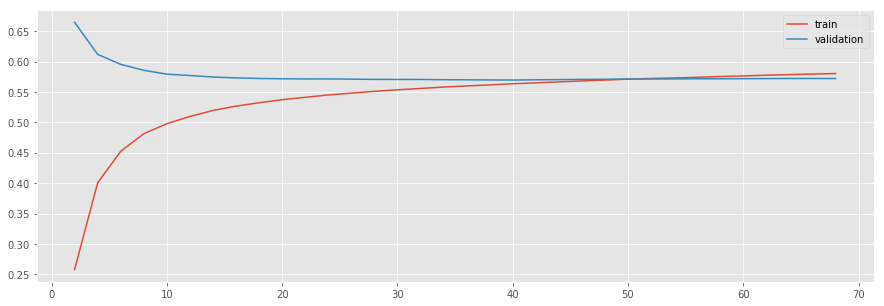

In [172]:
f = plt.figure(figsize=(15,5))
plt.plot(list(range(2,70,2)), history['mse'], label='train')
plt.plot(list(range(2,70,2)), history['val_mse'], label='validation')
plt.legend()

In [160]:
ls

01_serie_pozo_izquierdo.ipynb
02_serie_pozo_izquierdo_seleccion_lag_o_ventana.ipynb
03_serie_pozo_izquierdo_generacion_features.ipynb
04_serie_pozo_izquierdo_ml_k_nearest.ipynb
apple-ejemploInicial.ipynb
creacion-dataset.ipynb
metodo-ventana-horizonte.ipynb
n-nearest_regressor_10
n-nearest_regressor_10_01.npy
n-nearest_regressor_10_02.npy
n-nearest_regressor_10_03.npy
n-nearest_regressor_10_04.npy
n-nearest_regressor_10_05.npy
n-nearest_regressor_10_06.npy
n-nearest_regressor_10_07.npy
n-nearest_regressor_10_08.npy
n-nearest_regressor_12
n-nearest_regressor_12_01.npy
n-nearest_regressor_12_02.npy
n-nearest_regressor_12_03.npy
n-nearest_regressor_12_04.npy
n-nearest_regressor_12_05.npy
n-nearest_regressor_12_06.npy
n-nearest_regressor_12_07.npy
n-nearest_regressor_12_08.npy
n-nearest_regressor_14
n-nearest_regressor_14_01.npy
n-nearest_regressor_14_02.npy
n-nearest_regressor_14_03.npy
n-nearest_regressor_14_04.npy
n-nearest_regressor_14_05.npy
n-nearest_regressor_14_06.npy
n-nearest_reg

In [161]:
model = joblib.load('n-nearest_regressor_36')

In [162]:
features_test_set = test_set[features_columns]
predicted = model.predict(features_test_set)

In [163]:
df_target = test_set[['target_date', 'target']]
df_target.set_index(['target_date'], inplace=True)
df_target.head(5)

,target
target_date,
2004-08-19 21:36:00,11.7
2004-08-19 21:37:00,12.2
2004-08-19 21:38:00,11.2
2004-08-19 21:39:00,10.2
2004-08-19 21:40:00,10.1


In [164]:
predicted[:,0]

array([ 11.12222222,  11.33055556,  11.61388889, ...,  14.31111111,
        14.21111111,  14.34444444])

In [165]:
df_target.loc[:, 'predicted'] = predicted[:,0]

/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [166]:
df_target.head()

,target,predicted
target_date,,
2004-08-19 21:36:00,11.7,11.122222
2004-08-19 21:37:00,12.2,11.330556
2004-08-19 21:38:00,11.2,11.613889
2004-08-19 21:39:00,10.2,11.238889
2004-08-19 21:40:00,10.1,10.650000


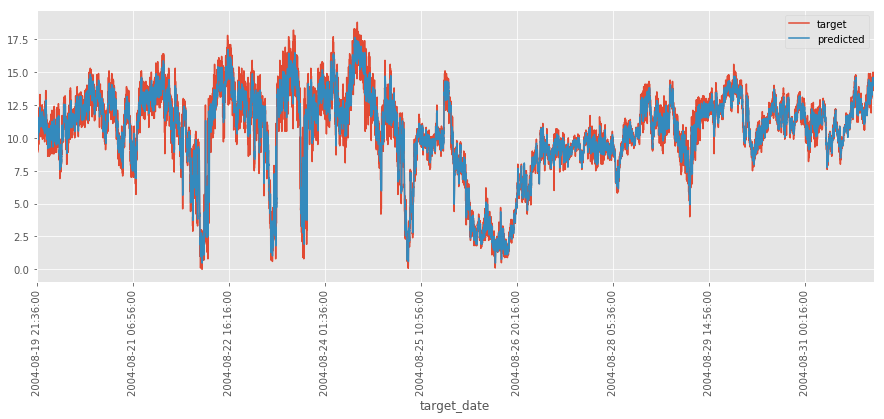

In [167]:
df_target.plot(figsize=(15,5), rot=90)

In [168]:
df_target.loc[:,'bias'] = df_target['target'] - df_target['predicted']

/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/pandas/core/indexing.py:561: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


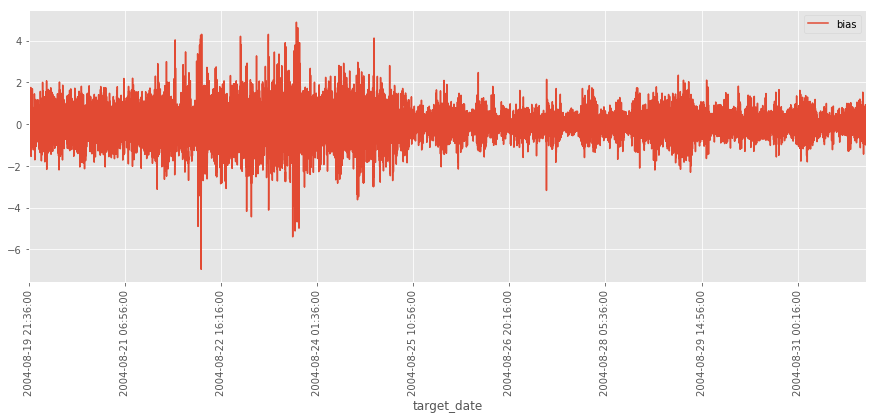

In [169]:
df_target[['bias']].plot(figsize=(15,5), rot=90)